In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2N1Y8e2TNeqYU-Fk32_E5udvIPQN9Jryc94RkRynJX5o',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'teambizwiz-donotdelete-pr-j40rap9hykqagu'
object_key = 'train.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
train.head()



,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2N1Y8e2TNeqYU-Fk32_E5udvIPQN9Jryc94RkRynJX5o',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'teambizwiz-donotdelete-pr-j40rap9hykqagu'
object_key = 'test.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)
test.head()



,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988$,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,...,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961$,2541758.2$,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,...,Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433$,3041031.0$,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,...,Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952$,1521716.4$,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,...,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835$,2455218.75$,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,...,Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [4]:
# train = pd.read_csv('train.csv')
# test=pd.read_csv('test.csv')

In [5]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index=True)

In [6]:
data.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,source
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3.0,73.6,train
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0,58.9,train
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4.0,68.8,train
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0,64.5,train
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4.0,62.4,train


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             9100 non-null   object 
 1   Lead_name              9100 non-null   object 
 2   Industry               9098 non-null   object 
 3   Deal_value             9044 non-null   object 
 4   Weighted_amount        8515 non-null   object 
 5   Date_of_creation       9100 non-null   object 
 6   Pitch                  9100 non-null   object 
 7   Contact_no             9100 non-null   object 
 8   Lead_revenue           9100 non-null   object 
 9   Fund_category          9100 non-null   object 
 10  Geography              8049 non-null   object 
 11  Location               9086 non-null   object 
 12  POC_name               9090 non-null   object 
 13  Designation            9100 non-null   object 
 14  Lead_POC_email         9100 non-null   object 
 15  Hiri

In [8]:
data.isna().sum()

Deal_title                  0
Lead_name                   0
Industry                    2
Deal_value                 56
Weighted_amount           585
Date_of_creation            0
Pitch                       0
Contact_no                  0
Lead_revenue                0
Fund_category               0
Geography                1051
Location                   14
POC_name                   10
Designation                 0
Lead_POC_email              0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update          801
Internal_POC                0
Resource                  163
Internal_rating             0
Success_probability      2093
source                      0
dtype: int64

In [9]:
# Convert Deal_value column to numerical (remove '$' and convert to float)
data['Deal_value'] = data['Deal_value'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert Weighted_amount column to numerical (remove '$' and convert to float)
data['Weighted_amount'] = data['Weighted_amount'].str.replace('$', '').str.replace(',', '').astype(float)

# Date_of_creation can be converted to datetime
data['Date_of_creation'] = pd.to_datetime(data['Date_of_creation'])

/tmp/wsuser/ipykernel_166/2691622629.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Deal_value'] = data['Deal_value'].str.replace('$', '').str.replace(',', '').astype(float)
/tmp/wsuser/ipykernel_166/2691622629.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Weighted_amount'] = data['Weighted_amount'].str.replace('$', '').str.replace(',', '').astype(float)


In [10]:
data.isna().sum()

Deal_title                  0
Lead_name                   0
Industry                    2
Deal_value                 56
Weighted_amount           585
Date_of_creation            0
Pitch                       0
Contact_no                  0
Lead_revenue                0
Fund_category               0
Geography                1051
Location                   14
POC_name                   10
Designation                 0
Lead_POC_email              0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update          801
Internal_POC                0
Resource                  163
Internal_rating             0
Success_probability      2093
source                      0
dtype: int64

In [11]:
data.drop(['Lead_name','Contact_no','POC_name','Lead_POC_email'],axis=1,inplace=True)

In [12]:
data.Geography.fillna(method ='ffill', inplace = True)
#data.Geography=data.Geography.astype("category")

In [13]:
data['Designation'] = data['Designation'].replace({'Chairman/CEO/President':'Chairman/CEO/President',
                                              'CEO/Chairman/President':'Chairman/CEO/President',
                                              'Chief Executive Officer':'CEO',
                                              'Vice President / GM (04-present) : VP Sales and Marketing (01-04)':'Vice President/GM'})

In [14]:
data['Industry'].replace(np.nan,'Banks',inplace=True)

In [15]:
data['Internal_rating'].replace({-1.00:1.00,
                                82.34:4.00},inplace=True)

In [16]:
data['Last_lead_update'] = data['Last_lead_update'].map({'Up-to-date':'Up-to-date',
                                        'more than a month':'Pending',
                                        'Following up but lead not responding':'Pending',
                                        '?':'No track',
                                        '2 days back':'Pending','5 days back':'Pending',
                                        'More than 2 weeks':'Pending','More than 2 weeks':'Pending',
    'Did not hear back after Level 1':'Pending','More than a week back':'Pending'})
data['Last_lead_update'].replace(np.nan,'No track',inplace=True)
data['Last_lead_update'].replace('?','No track',inplace=True)

In [17]:
data['Location'].replace(np.nan,'Aurangabad',inplace=True)

In [18]:
data['Weighted_amount'].fillna(data['Weighted_amount'].mean(),inplace=True)
data['Deal_value'].fillna(data['Deal_value'].mean(),inplace=True)

In [19]:
data['Resource'] = data['Resource'].map({'We have all the requirements':'Yes',
                                        'Cannot deliver':'No',
                                        'Not enough':'No',
                                        'Deliverable':'Yes'})

In [20]:
data['Resource'].replace(np.nan,'Yes',inplace=True)

In [21]:
data.isnull().sum()

Deal_title                  0
Industry                    0
Deal_value                  0
Weighted_amount             0
Date_of_creation            0
Pitch                       0
Lead_revenue                0
Fund_category               0
Geography                   0
Location                    0
Designation                 0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update            0
Internal_POC                0
Resource                    0
Internal_rating             0
Success_probability      2093
source                      0
dtype: int64

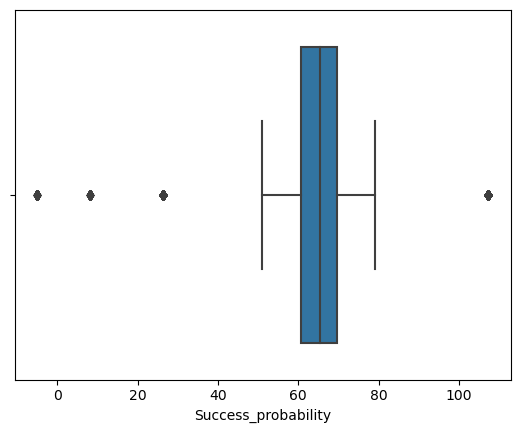

In [22]:
sns.boxplot(x = 'Success_probability',data = data)
plt.show()

In [23]:
data.loc[data['Success_probability']>100]

,Deal_title,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,source
20,TitleYHYTQ,Banks,5338.0,33362.50,2020-02-18,Product_1,500 Million - 1 Billion,Category 3,USA,"Peoria, IL",CEO/President,Early years teacher,Website,Level 1,No track,"Cashin,Marc C",Yes,5.0,107.34,train
25,TitleRDLL2,Banks,164309.0,977638.55,2020-01-27,Product_1,50 - 100 Million,Category 2,India,Chirala,Chairman/CEO/President,"Designer, multimedia",Marketing Event,Level 1,No track,"Jones,Michael L",No,5.0,107.34,train
48,TitleZITZC,Banks,376485.0,2560098.00,2020-05-02,Product_2,50 - 100 Million,Category 1,USA,"Kingsport-Bristol-Bristol, TN-VA",Vice President/GM,Secondary school teacher,Contact Email,Level 3,No track,"McKenstry,Loretta A",Yes,3.0,107.34,train
54,TitleKUWBI,Banks,420368.0,2480171.20,2020-02-16,Product_2,50 - 100 Million,Category 2,India,Rajkot,SVP/General Counsel,Horticultural therapist,Website,Level 2,Pending,"Ross,Eric L",Yes,4.0,107.34,train
65,Title8W9AG,Insurance,58778.0,405568.20,2020-02-17,Product_2,500 Million - 1 Billion,Category 4,India,Tiruchchirappalli,Chairman/CEO/President,"Accountant, chartered",Website,Level 3,No track,"Knox,Antonio D",Yes,4.0,107.34,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6977,TitleJ6OUO,Railroads,304515.0,1735735.50,2020-02-21,Product_1,100 - 500 Million,Category 2,India,Warangal,CEO/Co-Founder/Chairman,Sports development officer,Contact Email,Level 1,Pending,"Smith,Keenan H",Yes,3.0,107.34,train
6978,TitleMICX8,Human Resources,364919.0,2298989.70,2020-11-09,Product_2,500 Million - 1 Billion,Category 4,USA,"Spartanburg, SC",Chairman/Chief Innovation Officer,Fast food restaurant manager,Contact Email,Level 1,Pending,"Robinson,John C",No,1.0,107.34,train
6980,Title9SKYT,Materials/Manufacturing,148310.0,934353.00,2020-06-01,Product_1,100 - 500 Million,Category 3,India,Hubli,CEO,"Administrator, local government",Website,Level 3,Pending,"Vickers Jr.,Henry J",No,1.0,107.34,train
6997,TitleFG9CH,Banks,106817.0,742378.15,2019-10-18,Product_2,100 - 500 Million,Category 4,USA,"Erie, PA",CEO,Licensed conveyancer,Others,Level 3,Pending,"Maine,John P",Yes,5.0,107.34,train


In [24]:
data.loc[data['Success_probability']<0]

,Deal_title,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,source
50,TitleJ828U,Banks,411909.0,2471454.00,2021-02-14,Product_1,100 - 500 Million,Category 3,USA,"Sioux Falls, SD",Chairman/CEO/President,Medical laboratory scientific officer,Contact Email,Level 2,Pending,"Heidelberg,Andre D",Yes,1.0,-5.0,train
138,TitleF0RCH,Aerospace/Defense,180377.0,1145393.95,2020-05-16,Product_2,50 - 100 Million,Category 3,USA,"Altoona, PA",SVP/General Counsel,Higher education lecturer,Website,Level 3,Pending,"Cash,Tyrone J",Yes,2.0,-5.0,train
223,TitleA1251,Banks,154906.0,960417.20,2020-03-21,Product_2,50 - 100 Million,Category 1,USA,"Myrtle Beach-Conway-North Myrtle Beach, SC-NC",Executive Vice President,Solicitor,Website,Level 1,Pending,"Cashin,Marc C",Yes,2.0,-5.0,train
224,Title6XBOE,Real Estate,308734.0,1914150.80,2019-07-31,Product_1,100 - 500 Million,Category 3,India,Sirsa,Chairman/CEO/President,Agricultural engineer,Contact Email,Level 2,Pending,"Morsy,Omar A",Yes,5.0,-5.0,train
303,TitleT985L,Hotels/Motels,77206.0,451655.10,2019-09-14,Product_1,100 - 500 Million,Category 2,USA,"Montgomery, AL",Chairman/Chief Innovation Officer,Legal secretary,Website,Level 1,Pending,"Abdul-Hamid,Saud Muhamad",No,2.0,-5.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6541,TitleUBGDK,Biotech/Healthcare,279337.0,1745856.25,2020-12-17,Product_1,100 - 500 Million,Category 2,USA,"New Bern, NC",CEO,Broadcast engineer,Contact Email,Level 3,Pending,"Ullrich,Rose Anne",Yes,2.0,-5.0,train
6746,TitleJD4JF,REIT,176331.0,1199050.80,2020-10-07,Product_2,50 - 100 Million,Category 1,USA,"Olympia-Tumwater, WA",CEO,Investment analyst,Contact Email,Level 3,Pending,"Ross,Eric L",Yes,4.0,-5.0,train
6902,TitleXOLJN,Food Processing,88938.0,569203.20,2019-05-11,Product_2,100 - 500 Million,Category 2,India,Bhavnagar,CEO/President,"Engineer, electrical",Website,Level 3,Up-to-date,"Heidelberg,Andre D",Yes,4.0,-5.0,train
6911,Title6DKBW,Online Banking,485564.0,3350391.60,2020-05-07,Product_1,500 Million - 1 Billion,Category 1,India,Nanded,Chairman/CEO/President,"Producer, radio",Marketing Event,Level 2,No track,"Rocks,Michael J",Yes,5.0,-5.0,train


In [25]:
data['Success_probability'] = data['Success_probability'].apply(lambda x:100.0 if x>100 else x)
data['Success_probability'] = data['Success_probability'].apply(lambda x:0.0 if x<0 else x)

In [26]:
data['Success_probability'].fillna(value=data['Success_probability'].mean(), inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Deal_title             9100 non-null   object        
 1   Industry               9100 non-null   object        
 2   Deal_value             9100 non-null   float64       
 3   Weighted_amount        9100 non-null   float64       
 4   Date_of_creation       9100 non-null   datetime64[ns]
 5   Pitch                  9100 non-null   object        
 6   Lead_revenue           9100 non-null   object        
 7   Fund_category          9100 non-null   object        
 8   Geography              9100 non-null   object        
 9   Location               9100 non-null   object        
 10  Designation            9100 non-null   object        
 11  Hiring_candidate_role  9100 non-null   object        
 12  Lead_source            9100 non-null   object        
 13  Lev

In [28]:
# Column transformation pipeline
#numeric_features = ['Deal_value', 'Weighted_amount']
#categorical_features = ['Industry', 'Pitch', 'Lead_revenue', 'Fund_category', 'Geography', 'Location', 'Designation', 'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource','Internal_rating']


In [29]:
#df=data[['Deal_value', 'Weighted_amount','Industry', 'Pitch', 'Lead_revenue', 'Fund_category', 'Geography', 'Location', 'Designation', 'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource','Internal_rating','Success_probability']]

In [30]:
numeric_features=['Deal_value','Weighted_amount']
categorical_features=['Pitch','Lead_revenue']

In [31]:
df=data[['Deal_value','Weighted_amount','Pitch','Lead_revenue','Success_probability']]

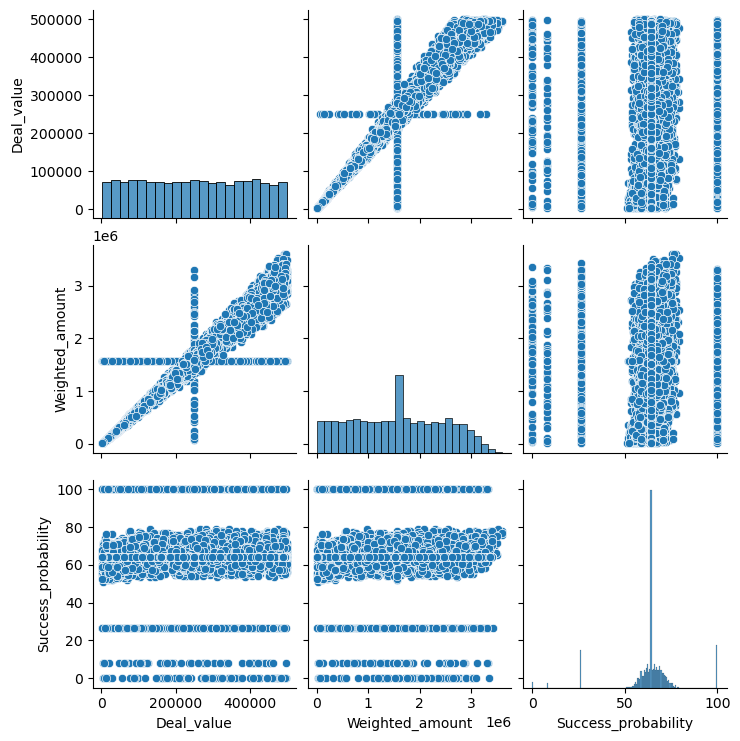

In [32]:
sns.pairplot(df)

In [33]:
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [34]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Success_probability'])
y = df['Success_probability']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
print(X.shape)
print(y.shape)

(9100, 4)
(9100,)


In [36]:
# Define the parameter grid for hyperparameter optimization
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [37]:
from sklearn.ensemble import RandomForestRegressor
# Build the model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(max_depth=10,min_samples_leaf=4,random_state=42,min_samples_split=10,n_estimators=100))
])

# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Deal_value',
                                                   'Weighted_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pitch', 'Lead_revenue'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=10,
                                       random_state=42))])

In [38]:
# Access the trained RandomForestRegressor from the pipeline
trained_rf_regressor = model_pipeline.named_steps['model']

# Get the feature importances
feature_importances = trained_rf_regressor.feature_importances_

# Print or visualize the feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

Deal_value: 0.4650971752572812
Weighted_amount: 0.4513173876730559
Pitch: 0.01107606172311679
Lead_revenue: 0.014440318374377726


In [39]:
df2=[]
for feature, importance in zip(X_train.columns, feature_importances):
  if importance>0.001:
    print(f"{feature}: {importance}")
    df2.append(feature)

Deal_value: 0.4650971752572812
Weighted_amount: 0.4513173876730559
Pitch: 0.01107606172311679
Lead_revenue: 0.014440318374377726


In [40]:
'''# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean Squared Error on Test Set: {mse}')'''

"# Perform grid search with cross-validation\ngrid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')\ngrid_search.fit(X_train, y_train)\n\n# Get the best model and evaluate on the test set\nbest_model = grid_search.best_estimator_\ny_pred = best_model.predict(X_test)\nmse = mean_squared_error(y_test, y_pred)\n\nprint(f'Best Hyperparameters: {grid_search.best_params_}')\nprint(f'Mean Squared Error on Test Set: {mse}')"

In [41]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error

y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("mse",mse)

Root Mean Squared Error: 14.840815528015318
Mean Absolute Error: 7.754967097929558
mse 220.2498055365806


## Deployment on IBM

In [42]:
!pip install -U ibm-watson-machine-learning

In [43]:
from ibm_watson_machine_learning import APIClient

## Authenticate and set space

In [44]:
wml_credentials = {
    'apikey':'sNnHt3VkLIzv3uxL99SxCr7cvjXRMhISN8_nKbTCQXuL',
    'url':'https://us-south.ml.cloud.ibm.com'
    
}

In [45]:
wml_client = APIClient(wml_credentials)

In [46]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------  ------------------------
ID                                    NAME                 CREATED
aef6e2df-914e-452b-8035-4846c12168fa  WasteWhizCloudSpace  2023-08-31T06:43:25.174Z
------------------------------------  -------------------  ------------------------


,ID,NAME,CREATED
0,aef6e2df-914e-452b-8035-4846c12168fa,WasteWhizCloudSpace,2023-08-31T06:43:25.174Z


In [47]:
SPACE_ID = "aef6e2df-914e-452b-8035-4846c12168fa"

In [48]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [49]:
wml_client.software_specifications.list(100)

-----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                           ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10        01ce9391-1a79-5a33-94fb-2e134337f314  base  not_provided
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10       079a91e0-245f-5269-8926-3c20b28f37dc  base  not_provided
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base  unsupported         pytorch

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,not_provided,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,not_provided,
...,...,...,...,...,...
95,autoai-kb_3.0-py3.6,d139f196-e04b-5d8b-9140-9a10ca1fa91a,base,unsupported,autoai-kb_rt22.2-py3.10
96,spark-mllib_3.0-py36,d82546d5-dd78-5fbb-9131-2ec309bc56ed,base,unsupported,spark-mllib_3.3
97,autoai-kb_3.4-py3.8,da9b39c3-758c-5a4f-9cfd-457dd4d8c395,base,unsupported,autoai-kb_rt22.2-py3.10
98,kernel-spark3.2-r3.6,db2fe4d6-d641-5d05-9972-73c654c60e0a,base,not_provided,


## Save Deployment model

In [50]:
MODEL_NAME = "WASTEWHIZ"
DEPLOYMENT_NAME = "WasteWhizCloudSpace"
DEMO_MODEL = model_pipeline

In [51]:
#SET PYTHON VERSION
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [52]:
import sklearn
sklearn.__version__

'1.1.1'

In [53]:
# SetUp Model Data
model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [55]:
# Save Model
model_details = wml_client.repository.store_model(
                model = DEMO_MODEL,
meta_props = model_props,
training_data = X_train,
training_target = y_train)

In [56]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Success_probability',
  'schemas': {'input': [{'fields': [{'name': 'Deal_value', 'type': 'float64'},
      {'name': 'Weighted_amount', 'type': 'float64'},
      {'name': 'Pitch', 'type': 'object'},
      {'name': 'Lead_revenue', 'type': 'object'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'Deal_value', 'type': 'float64'},
      {'name': 'Weighted_amount', 'type': 'float64'},
      {'name': 'Pitch', 'type': 'object'},
      {'name': 'Lead_revenue', 'type': 'object'}],
     'id': '1',
     'type': 'DataFrame'},
    'type': 'container'}],
  'type': 'scikit-learn_1.1'},
 'metadata': {'created_at': '2023-08-31T07:46:04.864Z',
  'id': 'c6396386-d9bc-40bf-aaa9-f75c6334ac63',
  'modified_at': '2023-08-31T07:46:07

In [57]:
model_id = wml_client.repository.get_model_id(model_details)

In [58]:
model_id

'c6396386-d9bc-40bf-aaa9-f75c6334ac63'

In [60]:
# Set Meta

deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME : DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [61]:
deployment = wml_client.deployments.create(
            artifact_uid = model_id,
            meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: 'c6396386-d9bc-40bf-aaa9-f75c6334ac63' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='44584f11-94e9-40cb-a149-f1161db5f476'
------------------------------------------------------------------------------------------------


